In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from bs4 import BeautifulSoup
import requests

In [179]:
def converting_dist(mph):
    return 1.609344*mph

In [180]:
# copy/paste the definition of the function 'get_regression_coeff' from lab-p13 here
def get_regression_coeff(df, x, y):
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

In [181]:
def regression_line_plot(df, x, y):
    reg_tup=get_regression_coeff(df,x,y)
    m,b=reg_tup[0],reg_tup[1]
    ax=df.plot.scatter(x,y,color='k')
    df['fit'] = m * df[x] + b
    df.plot.line(x,'fit',ax=ax,color='r')
    ax.set_xlim(0,24)
    ax.set_ylim(20,50)

In [182]:
# Load the dataset
data = pd.read_csv('Berlin_Traffic_Data.csv')

In [183]:
data = data[0:10001]

In [184]:
# Split the dataset into features and target variable
X = data[['hour','day','month']].values.astype(float)
y = data[['speed_kph_mean']].values.astype(float)

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(32, input_shape=(3,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))

# Evaluate the model on the test set
mse, mae = model.evaluate(X_test, y_test, verbose=0)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Print the model's performance metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 1322.5590 - mae: 31.7388 - val_loss: 568.6297 - val_mae: 18.1613
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 507.8639 - mae: 17.7471 - val_loss: 435.2101 - val_mae: 16.1164
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 450.1906 - mae: 16.5242 - val_loss: 365.6991 - val_mae: 14.4795
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 371.8555 - mae: 14.8187 - val_loss: 291.4526 - val_mae: 12.6227
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 319.3079 - mae: 13.5268 - val_loss: 258.4670 - val_mae: 11.9130
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 301.6350 - mae: 13.0921 - val_loss: 250.3948 - val_mae: 11.2164
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 298.3023 - mae: 12.9155 - val_loss: 242.3577 - val_mae: 11.1336
Epoch 8/50
50/50 [=============================

In [185]:
spd_prd = y_pred.tolist()
congestion_threshold = converting_dist(30)

In [186]:
test_var=[]
for ele in spd_prd:
    test_var.append(X_test[ele[0]< congestion_threshold].tolist())
test_var=test_var[0][0]

In [187]:
speed_list=y_pred.tolist()
speed_df_list=[]
for ele in speed_list:
    speed_df_list.append(ele[0])
len(speed_list)

2001

In [188]:
y_pred = model.predict(X_test)

# Print the congested segments
#print('The following segments are predicted to be congested:')
#print(congested_segments)
tot=[]
for ele in test_var:
    temp_dict={}
    temp_dict["Hour"]= ele[0]
    temp_dict["Month"]= ele[1]
    temp_dict["Day"]= ele[2]
    tot.append(temp_dict)

63/63 [==============================] - 0s 1ms/step


In [189]:
tot_df = pd.DataFrame(tot)
tot_df['Avg_Speed']=speed_df_list

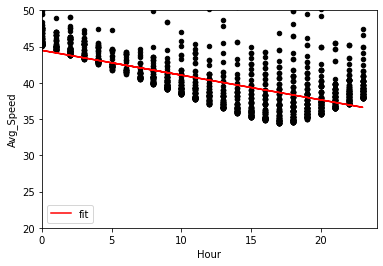

In [190]:
regression_line_plot(tot_df, 'Hour', 'Avg_Speed')

In [191]:
m=get_regression_coeff(tot_df, 'Hour', 'Avg_Speed')
m

(-0.3415611644789435, 44.47946779921483)

In [192]:
var=(data['hour']*m[0]+m[1])-data['speed_kph_mean']
round(var.mean(),4)

-3.1742